In [4]:
import tensorflow as tf

In [71]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
xdata=np.linspace(0.0,10.0,1000000)

In [10]:
noise = np.random.randn(len(xdata))

In [11]:
xdata
noise

array([ 0.87446247, -2.57544957, -0.95794355, ...,  0.53678126,
       -0.56594899, -0.4823565 ])

In [12]:
ytrue=(0.5*xdata)+5+noise

In [13]:
xdf=pd.DataFrame(data=xdata,columns=['X-Data'])

In [14]:
ydf=pd.DataFrame(data=ytrue,columns=['Y'])

In [15]:
mydata=pd.concat([xdf,ydf],axis=1)

In [16]:
mydata.head()

,X-Data,Y
0,0.00000,5.874462
1,0.00001,2.424555
2,0.00002,4.042066
3,0.00003,6.522691
4,0.00004,6.509940


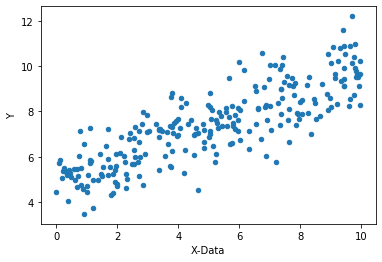

In [19]:
mydata.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')

In [20]:
batchsize=8

In [21]:
m=tf.Variable(0.5)
b=tf.Variable(1.0)

In [22]:
xph=tf.placeholder(tf.float32,[batchsize])
yph=tf.placeholder(tf.float32,[batchsize])

In [23]:
ymodel=m*xph+b

In [24]:
error=tf.reduce_sum(tf.square(xph-ymodel))

In [62]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [63]:
train=optimizer.minimize(error)

In [64]:
init=tf.global_variables_initializer()

In [65]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        rand_ind=np.random.randint(len(xdata),size=batchsize)
        feed={xph:xdata[rand_ind],yph:ytrue[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])    

In [66]:
model_m

0.99682564

In [67]:
model_b 

0.021783162

In [68]:
yhat=xdata*model_m+model_b

In [69]:
import matplotlib.pyplot as plt

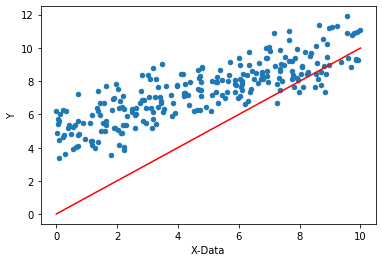

In [70]:
mydata.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(xdata,yhat,'r')

In [74]:
#Estimator API
featcols=[tf.feature_column.numeric_column('x',shape=[1])]

In [75]:
estimator =tf.estimator.LinearRegressor(feature_columns=featcols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hp\\AppData\\Local\\Temp\\tmpy3p62rkq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002476996D898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
xtrain,xeval,ytrain,yeval=train_test_split(xdata,ytrue,test_size=0.3,random_state=0)

In [79]:
xtrain.shape
xeval.shape

(300000,)

In [86]:
inputfunc=tf.estimator.inputs.numpy_input_fn({'x':xtrain},ytrain,batch_size=4,num_epochs=None,shuffle=True)

In [87]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':xtrain},ytrain,batch_size=4,num_epochs=1000,shuffle=False)

In [88]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':xtrain},ytrain,batch_size=4,num_epochs=1000,shuffle=False)

In [90]:
estimator.train(input_fn=inputfunc,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hp\AppData

In [94]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-02T20:12:32Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpy3p62rkq\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-02-20:12:33
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1328155, global_step = 1000, label/mean = 7.540582, loss = 4.531262, prediction/mean = 7.278141
INFO:tensorflow:Saving 'checkpoint_path' su

In [95]:
eval_metrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-02T20:13:43Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpy3p62rkq\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-04-02-20:13:43
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1328155, global_step = 1000, label/mean = 7.540582, loss = 4.531262, prediction/mean = 7.278141
INFO:tensorflow:Saving 'checkpoint_path' su

In [97]:
input_fu_predict=tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [98]:
list(estimator.predict(input_fn=input_fu_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpy3p62rkq\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3041573], dtype=float32)},
 {'predictions': array([4.9596286], dtype=float32)},
 {'predictions': array([5.6151], dtype=float32)},
 {'predictions': array([6.270571], dtype=float32)},
 {'predictions': array([6.9260426], dtype=float32)},
 {'predictions': array([7.5815134], dtype=float32)},
 {'predictions': array([8.236985], dtype=float32)},
 {'predictions': array([8.892456], dtype=float32)},
 {'predictions': array([9.547928], dtype=float32)},
 {'predictions': array([10.203399], dtype=float32)}]

In [99]:
predictions=[]
for x in estimator.predict(input_fn=input_fu_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hp\AppData\Local\Temp\tmpy3p62rkq\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [100]:
predictions

[array([4.3041573], dtype=float32),
 array([4.9596286], dtype=float32),
 array([5.6151], dtype=float32),
 array([6.270571], dtype=float32),
 array([6.9260426], dtype=float32),
 array([7.5815134], dtype=float32),
 array([8.236985], dtype=float32),
 array([8.892456], dtype=float32),
 array([9.547928], dtype=float32),
 array([10.203399], dtype=float32)]

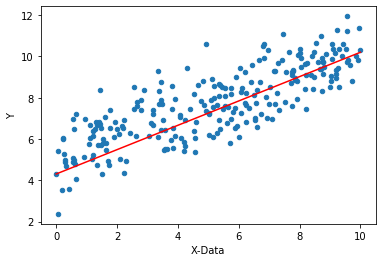

In [103]:
mydata.sample(n=250).plot(kind='scatter',x='X-Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')